In [4]:
import os
os.chdir("D:/WORK/Great Lakes/5th Term/PAM/Class10")

In [2]:
#SVM-Example-DiscriWinston

In [5]:
#Import Core Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score,precision_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Read the file
mydata=pd.read_csv("DiscriWinston.csv")
mydata.head()

,Person,Income,InvestAmt,WSJSubscriber
0,1,66.4,26.9,No
1,2,68.0,7.1,No
2,3,54.9,21.5,No
3,4,50.6,19.3,No
4,5,54.1,16.7,No


In [7]:
#Convert Target Group Variable into 0/1 format
mydata["WSJSubscriber"]=(mydata["WSJSubscriber"]=="Yes").astype(int)

In [8]:
#Define X and Y
X=mydata.iloc[:,1:3]
Y=mydata["WSJSubscriber"]

In [9]:
#Build the SVM Model for linear kernel
svc_model=SVC(kernel="linear",probability=True)
SVM1=svc_model.fit(X,Y)
SVM1
SVM1.decision_function(X)

array([-2.68732997, -6.64812072, -3.19345691, -3.41818255, -4.09651665,
       -2.27409312, -3.28578638, -4.44939935, -5.80474302, -2.76588313,
       -5.55786446, -2.27219814, -3.68251591, -4.71892915, -0.20674831,
       -0.03181999, -3.02803628, -2.96024319, -1.24022729,  1.03957498,
       -3.36698858, -2.15912224, -3.64528184, -4.92047243, -3.18600813,
       -1.67771529, -2.93666413, -4.63217315, -4.56097697, -0.35509117,
       -0.85763142, -6.66140853, -3.87990204, -4.13538013, -2.8352958 ,
       -2.49532387, -3.13726976, -2.95750236, -0.99995165, -2.95798102,
       -2.82388329, -3.84058939, -1.43496438, -3.17299571, -4.11341082,
       -4.17393872, -4.89311325, -5.17555383, -1.00003362, -1.16261178,
        0.37861372, -3.29219587, -2.63857193, -3.43602422, -5.63774214,
       -2.25467121, -1.65733605,  1.00129178,  4.12842563, -0.54803492,
        3.37238423,  1.96443027, -0.22267533,  2.61672969,  3.23790948,
        2.09060055,  1.2922106 ,  2.08843017,  0.94366865,  1.66

In [12]:
#Overall Accuracy,recall,precision
Prediction=SVM1.predict(X)
print("Accuracy=","{:.4f}".format(accuracy_score(Y,Prediction)))
print("Recall=","{:.4f}".format(recall_score(Y,Prediction)))
print("Precision","{:.4f}".format(precision_score(Y,Prediction)))

Accuracy= 0.9167
Recall= 0.8148
Precision 0.9167


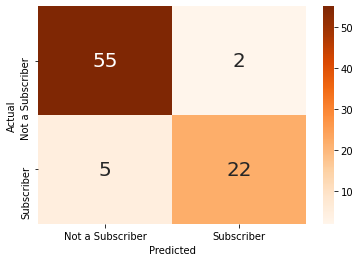

In [13]:
#Getting Confusion Matrix
confusion=confusion_matrix(Y,Prediction)
sns.heatmap(confusion,annot=True,cmap="Oranges",annot_kws={"size":20},
           xticklabels=["Not a Subscriber","Subscriber"],
           yticklabels=["Not a Subscriber","Subscriber"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [14]:
#Getting Probabilities
Probability=SVM1.predict_proba(X)
Probability=pd.DataFrame(Probability)
Probability

,0,1
0,0.947508,0.052492
1,0.999176,0.000824
2,0.968931,0.031069
3,0.975432,0.024568
4,0.987939,0.012061
...,...,...
79,0.051680,0.948320
80,0.786150,0.213850
81,0.401810,0.598190
82,0.165951,0.834049


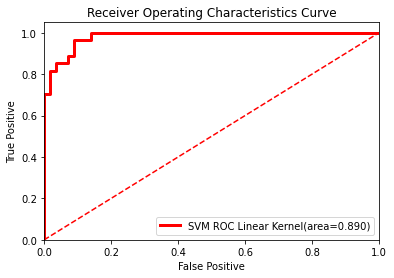

In [15]:
#ROC Curve
svmroc=roc_auc_score(Y,Prediction)
fpr,tpr,thresholds=roc_curve(Y,Probability[1])
plt.figure()
plt.plot(fpr,tpr,color="red",lw=3,label="SVM ROC Linear Kernel(area=%0.3f)" %svmroc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operating Characteristics Curve")
plt.legend(loc="lower right")
plt.show()

In [56]:
#Build the SVM Model for linear kernel
svc_model=SVC(kernel="rbf", C=100, gamma=0.5, probability=True)
SVM1=svc_model.fit(X,Y)
SVM1
SVM1.decision_function(X)

array([-1.00002197, -0.99980294, -0.99970095, -0.99999431, -0.99997268,
       -0.99972453, -0.99972903, -1.00031951, -1.00000329, -1.00015807,
       -0.99980416, -0.99959864, -1.0005335 , -0.99969819, -0.99972507,
       -0.99970092, -0.99972427, -0.99985545, -0.99997263, -0.99997116,
       -1.00038391, -1.00000271, -1.00040289, -1.00048356, -0.99992057,
       -0.99999431, -1.00001612, -0.99980497, -1.00032553, -1.00002435,
       -0.99971418, -1.00002197, -0.99971058, -1.00000254, -1.00006835,
       -1.00025315, -0.99972532, -0.99988569, -0.99964271, -1.00002767,
       -0.99983314, -0.99971418, -0.99965127, -1.00012092, -1.00041205,
       -0.99996907, -1.0005217 , -1.00051854, -1.00011023, -0.99990363,
       -1.00008524, -0.99987593, -0.99968137, -0.99964476, -0.99968823,
       -1.00044678, -0.99973475,  1.00001994,  0.99959368,  1.00000763,
        1.00020126,  1.0003573 ,  0.99972008,  0.99981528,  0.99997684,
        0.99948591,  0.99961665,  1.00000361,  0.99966761,  0.99

In [57]:
#Overall Accuracy,recall,precision
Prediction=SVM1.predict(X)
print("Accuracy=","{:.4f}".format(accuracy_score(Y,Prediction)))
print("Recall=","{:.4f}".format(recall_score(Y,Prediction)))
print("Precision","{:.4f}".format(precision_score(Y,Prediction)))

Accuracy= 1.0000
Recall= 1.0000
Precision 1.0000


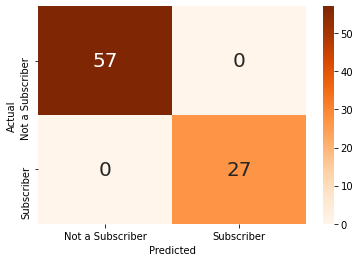

In [58]:
#Getting Confusion Matrix
confusion=confusion_matrix(Y,Prediction)
sns.heatmap(confusion,annot=True,cmap="Oranges",annot_kws={"size":20},
           xticklabels=["Not a Subscriber","Subscriber"],
           yticklabels=["Not a Subscriber","Subscriber"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [59]:
#Getting Probabilities
Probability=SVM1.predict_proba(X)
Probability=pd.DataFrame(Probability)
Probability

,0,1
0,0.972563,0.027437
1,0.972536,0.027464
2,0.972524,0.027476
3,0.972559,0.027441
4,0.972557,0.027443
...,...,...
79,0.005585,0.994415
80,0.005585,0.994415
81,0.005589,0.994411
82,0.005590,0.994410


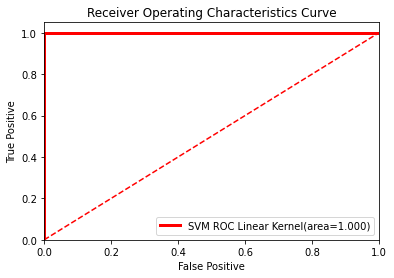

In [60]:
#ROC Curve
svmroc=roc_auc_score(Y,Prediction)
fpr,tpr,thresholds=roc_curve(Y,Probability[1])
plt.figure()
plt.plot(fpr,tpr,color="red",lw=3,label="SVM ROC Linear Kernel(area=%0.3f)" %svmroc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operating Characteristics Curve")
plt.legend(loc="lower right")
plt.show()